In [1]:
import pandas as pd
pd.set_option('display.max_columns',100)
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [207]:
df = pd.read_csv('Boats_Cleaned_dataset.csv')

In [208]:
df.sample(5)

,Unnamed: 0,id,type,boatClass,make,model,year,condition,length_ft,beam_ft,dryWeight_lb,hullMaterial,fuelType,numEngines,totalHP,maxEngineYear,minEngineYear,engineCategory,price,sellerId,city,state,zip,created_date,created_month,created_year
18198,19218,7131088,power,power-bass,Nitro,Z19,2019,new,19.33,7.83,1850.0,fiberglass,gasoline,1,200.0,NaN,NaN,outboard,42945.0,34422,Forest Lake,MN,55025,2019-06-28,6,2019
14691,15315,7057986,power,power-center,Tahoe,2150 CC,2019,new,21.08,8.50,2600.0,fiberglass,gasoline,1,200.0,NaN,NaN,outboard,43870.0,1078,Springfield,MO,65807,2019-04-22,4,2019
297,332,7209350,power,power-bowrider,Sea Ray,190 Sport,2017,used,19.00,NaN,NaN,fiberglass,other,1,0.0,NaN,NaN,NaN,29900.0,65089,Antioch,IL,60002,2019-09-09,9,2019
5242,5394,7167704,power,power-fresh,Lund,1400 Fury Tiller,2019,new,14.00,NaN,NaN,aluminum,other,1,0.0,NaN,NaN,NaN,7815.0,5525,Nekoosa,WI,NaN,2019-08-01,8,2019
3132,3174,7170425,power,power-pontoon,Bennington,21SSBX,2020,new,1.00,102.00,NaN,other,other,1,0.0,NaN,NaN,NaN,45020.0,27369,Red Wing,MN,NaN,2019-08-05,8,2019


In [209]:
# Remove unwanted column
df.drop(['Unnamed: 0','id','sellerId','zip'],axis=1,inplace=True)

In [210]:
# Check shape of the dataset
df.shape

(18903, 22)

In [211]:
df.isnull().sum()

,0
type,0
boatClass,0
make,0
model,35
year,0
condition,0
length_ft,0
beam_ft,6504
dryWeight_lb,11809
hullMaterial,0


In [212]:
# Check columns that have missig value percentage of above 50
missing_columns = df.isnull().mean()[(df.isnull().mean()*100)>50].index.values

In [213]:
# drop that colums
df.drop(columns=missing_columns,inplace=True)

In [214]:
df.sample(7)

,type,boatClass,make,model,year,condition,length_ft,beam_ft,hullMaterial,fuelType,numEngines,totalHP,price,city,state,created_date,created_month,created_year
13060,power,power-pontoon,Sun Tracker,SportFish 22 XP3,2019,new,24.17,8.50,aluminum,NaN,1,200.0,45765.0,NaN,MT,2019-02-16,2,2019
8285,power,power-fresh,Smoker Craft,ANGLER XLPATRIOT DLX 16 SC,2019,new,16.00,NaN,other,other,1,0.0,16499.0,Mecosta,MI,2019-10-11,10,2019
17941,power,power-bowrider,Stingray,208LR,2011,used,21.00,7.08,fiberglass,gasoline,1,0.0,24995.0,Okoboji,IA,2019-06-25,6,2019
14276,power,power-pontoon,Sun Tracker,Party Barge 20 DLX,2019,new,21.92,8.50,aluminum,gasoline,1,90.0,27675.0,Leesburg,GA,2019-04-01,4,2019
3820,power,power-cruiser,Yamaha Boats,212 LTD,2019,used,21.00,NaN,other,other,1,0.0,45999.0,Rochester,MN,2019-07-30,7,2019
1417,power,power-aluminum,Hewescraft,250 Alaskan,2019,new,25.00,102.00,aluminum,other,1,0.0,118000.0,Eugene,OR,2019-03-16,3,2019
14649,power,power-jon,Tracker,Grizzly 1860 CC,2019,new,19.17,7.00,aluminum,NaN,1,60.0,19265.0,Garner,NC,2019-04-19,4,2019


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18903 entries, 0 to 18902
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           18903 non-null  object 
 1   boatClass      18903 non-null  object 
 2   make           18903 non-null  object 
 3   model          18868 non-null  object 
 4   year           18903 non-null  int64  
 5   condition      18903 non-null  object 
 6   length_ft      18903 non-null  float64
 7   beam_ft        12399 non-null  float64
 8   hullMaterial   18903 non-null  object 
 9   fuelType       15951 non-null  object 
 10  numEngines     18903 non-null  int64  
 11  totalHP        18055 non-null  float64
 12  price          18903 non-null  float64
 13  city           18847 non-null  object 
 14  state          18903 non-null  object 
 15  created_date   18903 non-null  object 
 16  created_month  18903 non-null  int64  
 17  created_year   18903 non-null  int64  
dtypes: flo

In [216]:
# Checking duplicate values
print('Number of duplicated rows :',df.duplicated().sum())

Number of duplicated rows : 902


In [217]:
# Drop duplicate values
df.drop_duplicates(inplace=True)

In [218]:
df.sample()

,type,boatClass,make,model,year,condition,length_ft,beam_ft,hullMaterial,fuelType,numEngines,totalHP,price,city,state,created_date,created_month,created_year
14771,power,power-pwc,Yamaha WaveRunner,EX Deluxe,2019,new,10.3,3.75,other,gasoline,1,0.0,8799.0,Goldsboro,NC,2019-01-30,1,2019


# EDA

In [219]:
# Analyse the target column
df.price.describe()

,price
count,1.800100e+04
mean,6.779370e+05
std,7.490460e+07
min,5.000000e+02
25%,1.951500e+04
50%,3.452900e+04
75%,5.856300e+04
max,1.000000e+10


<Axes: ylabel='Frequency'>

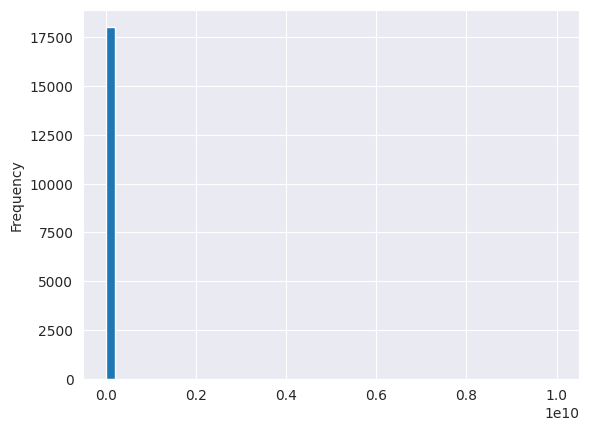

In [220]:
df.price.plot.hist(bins=50)

In [221]:
df.query('price>4000000')

,type,boatClass,make,model,year,condition,length_ft,beam_ft,hullMaterial,fuelType,numEngines,totalHP,price,city,state,created_date,created_month,created_year
100,power,power-flybridge,Princess,75 Motor Yacht,2017,used,75.00,18.92,fiberglass,diesel,2,3600.0,4.250000e+06,Fort Lauderdale,FL,2018-11-14,11,2018
10619,power,power-jet,AB,116,2012,used,116.00,24.58,composite,diesel,3,7200.0,1.400000e+07,NaN,NY,2014-06-28,6,2014
15567,power,power-barge,Custom,Barge,1970,used,375.00,85.00,steel,diesel,0,NaN,5.000000e+06,Tampa,FL,2018-10-01,10,2018
15718,power,power-mega,Westship,110,2007,used,110.00,25.25,fiberglass,diesel,1,2000.0,6.900000e+06,Wilmington,NC,2018-10-20,10,2018
16803,power,power-barge,Floating Boutique Hotel Barge,NaN,2009,used,375.00,85.00,steel,other,0,NaN,5.900000e+06,Tampa,FL,2015-07-01,7,2015
16978,power,power-bass,Phoenix,920 PRO XP,2020,new,20.60,8.00,composite,gasoline,0,NaN,1.000000e+09,Harrodsburg,KY,2019-06-13,6,2019
18566,power,power-motor,Hargrave,125 Raised Pilothouse,2013,used,125.00,25.00,fiberglass,diesel,2,3650.0,8.499000e+06,Sarasota,FL,2015-11-13,11,2015
18778,power,power-bass,Phoenix,721 Pro Xp,2020,new,20.11,8.00,composite,gasoline,0,NaN,1.000000e+10,Harrodsburg,KY,2019-07-06,7,2019


In [222]:
# drop the top
df.drop(df['price'].nlargest(10).index,inplace=True)

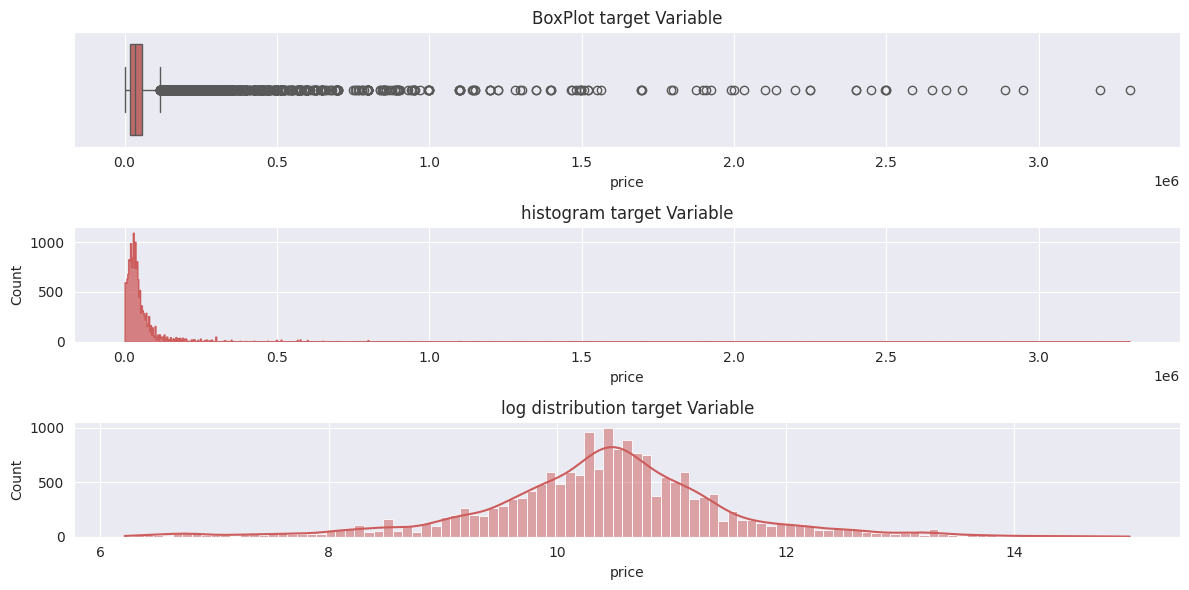

In [223]:
fig, ax = plt.subplots(3,1,figsize=(12,6))
sns.boxplot(data=df,x='price',ax=ax[0],color='indianred')
ax[0].set_title('BoxPlot target Variable')
sns.histplot(x=df['price'],ax=ax[1],element='step',color='indianred')
ax[1].set_title('histogram target Variable')
sns.histplot(x=np.log(df['price']),ax=ax[2],kde=True,color='indianred')
ax[2].set_title('log distribution target Variable')
plt.tight_layout()

In [224]:
df.shape

(17991, 18)

In [225]:
# Analyse type feature
df.type.value_counts()

,count
type,
power,17703
sail,254
unpowered,34


The target column is heavly right skewed and it is log_normal distribution

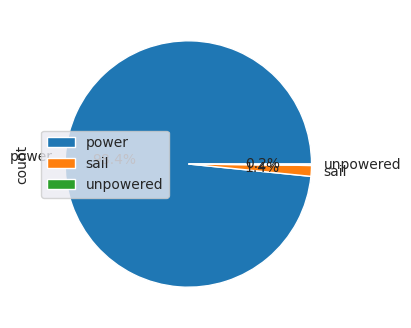

In [226]:
plt.figure(figsize=(5,4))
df.type.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.legend()

In [227]:
# i won't taking that feature it's not reliable
df.drop('type',axis=1)

,boatClass,make,model,year,condition,length_ft,beam_ft,hullMaterial,fuelType,numEngines,totalHP,price,city,state,created_date,created_month,created_year
0,power-center,Aquasport,210 CC,1992,used,21.00,8.50,fiberglass,gasoline,1,150.0,16500.0,Englewood,FL,2019-10-16,10,2019
1,power-sportcruiser,Formula,400 Super Sport,2018,used,40.00,11.00,fiberglass,diesel,2,800.0,539000.0,Harsens Island,MI,2019-09-24,9,2019
2,power-deck,Bayliner,Element 180,2020,new,18.00,7.42,fiberglass,gasoline,1,75.0,26995.0,Marietta,OH,2019-11-02,11,2019
3,power-expresscruiser,Regal,32 Express,2015,used,32.00,10.33,fiberglass,gasoline,2,600.0,169995.0,North Charleston,SC,2019-09-19,9,2019
4,power-aft,Carver,440 Aft Cabin Motor Yacht,1994,used,44.00,15.00,fiberglass,diesel,2,700.0,109900.0,Middle River,MD,2018-08-29,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18898,power-pontoon,Silver Wave,250 Play,2013,used,25.00,8.50,aluminum,gasoline,0,NaN,31973.0,Acworth,GA,2019-06-25,6,2019
18899,power-runabout,Rinker,Captiva 200 MTX,2013,used,19.33,8.00,fiberglass,gasoline,1,0.0,26995.0,New Baltimore,MI,2019-06-12,6,2019
18900,power-bay,Blazer,2200,2019,new,22.00,7.67,fiberglass,gasoline,0,NaN,39995.0,Seabrook,TX,2018-12-12,12,2018
18901,power-pontoon,Aloha,250,2004,used,25.00,8.50,aluminum,gasoline,0,NaN,16900.0,Sunrise Beach,MO,2019-05-10,5,2019


98% of data is power only 1.6% date is diffrent

<Axes: xlabel='type', ylabel='price'>

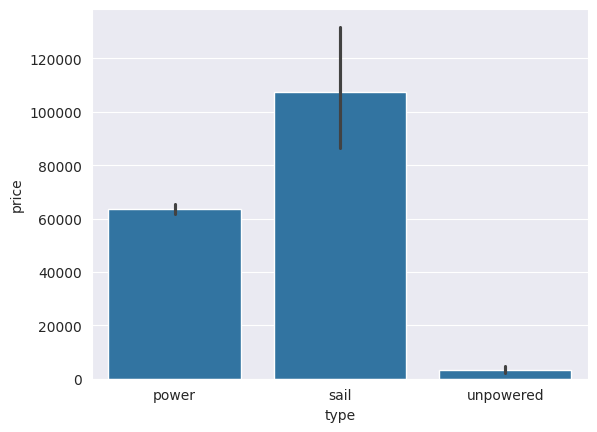

In [228]:
sns.barplot(x=df['type'],y=df['price'])

In [229]:
df['boatClass'].value_counts().head(15)

,count
boatClass,
power-pontoon,3697
power-bowrider,1318
power-bass,1270
power-center,1203
power-cruiser,1101
power-aluminum,984
power-jon,885
power-skiwake,852
power-fresh,728


In [230]:
df.make.value_counts().head(10)

,count
make,
Tracker,1865
Sun Tracker,901
Sea Ray,726
Bennington,638
Yamaha Boats,553
Nitro,423
Tahoe,406
Mako,394
Bayliner,378


In [231]:
df.model.value_counts().head(50)

,count
model,
Z18,93
Pro Team 175 TXW,91
Party Barge 22 DLX,84
Pro Guide V-16 SC,74
Pro Guide V-175 Combo,74
SportFish 22 DLX,72
Z19,71
Pro Team 175 TF,69
Fishin' Barge 20 DLX,64


In [232]:
df.year.value_counts()

,count
year,
2019,7794
2020,1621
2018,1381
2017,593
2016,494
...,...
1953,1
1910,1
1922,1


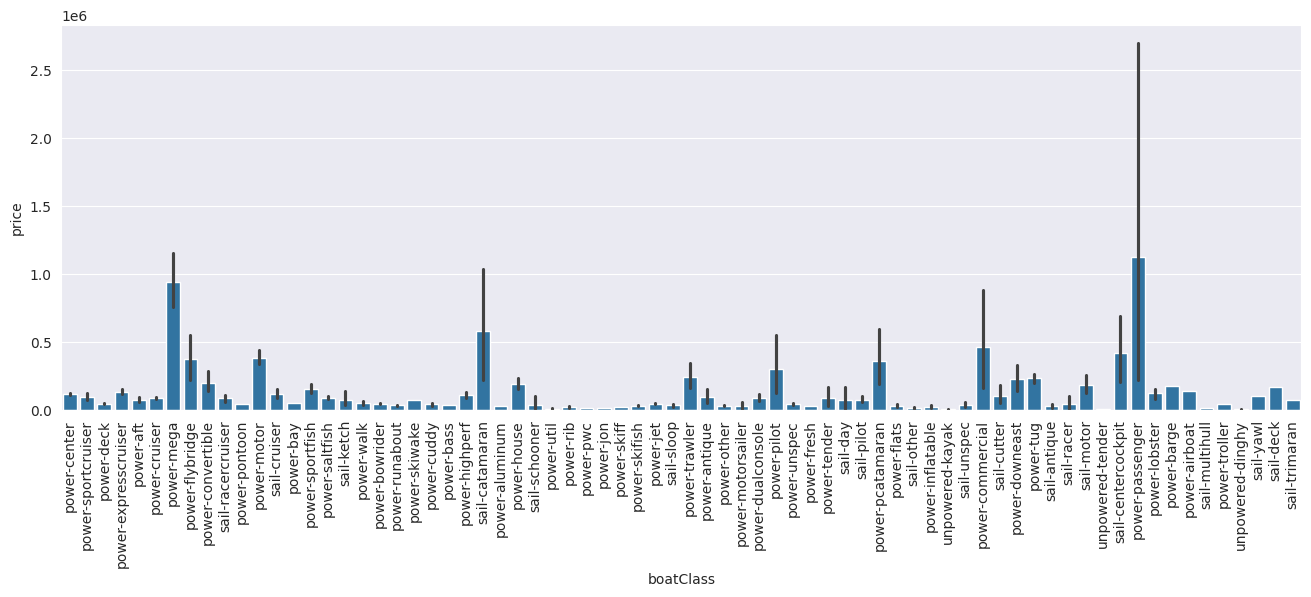

In [233]:
plt.figure(figsize=(16,5))
sns.barplot(x=df['boatClass'],y=df['price'])
plt.xticks(rotation=90)
plt.show()

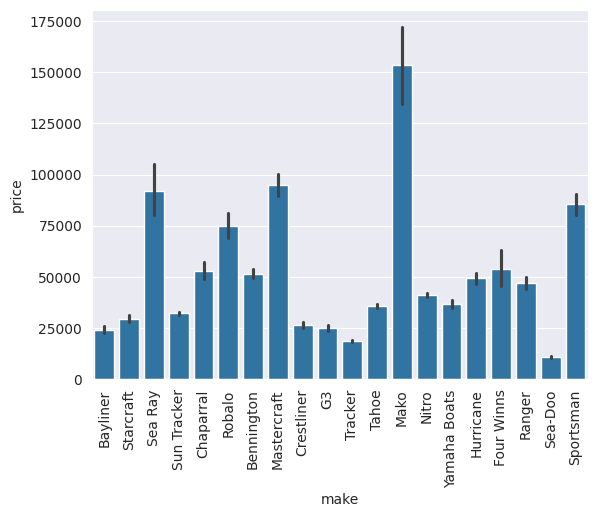

In [234]:
sns.barplot(x=df[df.make.isin(df.make.value_counts().head(20).index)]['make'],y=df[df.make.isin(df.make.value_counts().head(20).index)]['price'])
plt.xticks(rotation='vertical')
plt.show()

In [235]:
df['condition'].value_counts()

,count
condition,
new,10434
used,7557


<Axes: xlabel='condition', ylabel='price'>

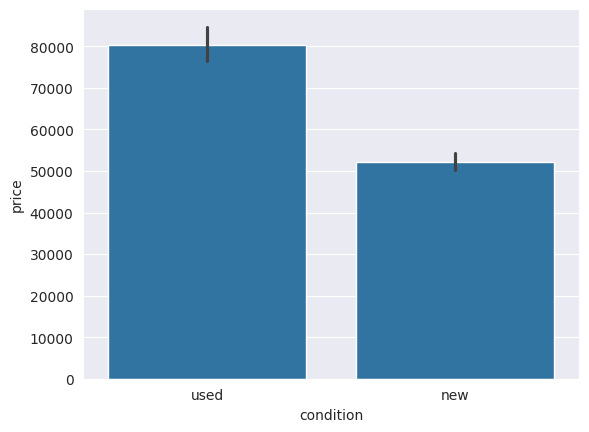

In [236]:
sns.barplot(x=df['condition'],y=df['price'])

<Axes: xlabel='length_ft', ylabel='price'>

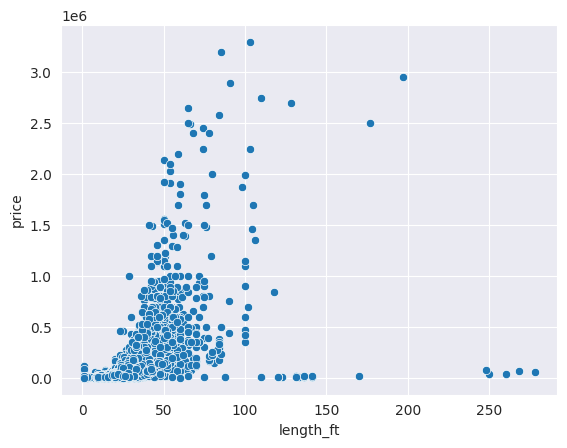

In [237]:
sns.scatterplot(x=df['length_ft'],y=df['price'])

In [238]:
outliers = df.query('price<500000 and length_ft>150').index
df.drop(outliers,inplace=True)

In [239]:
outliers_len = df.query('length_ft>170').index
df.drop(outliers_len,inplace=True)

<Axes: xlabel='beam_ft', ylabel='price'>

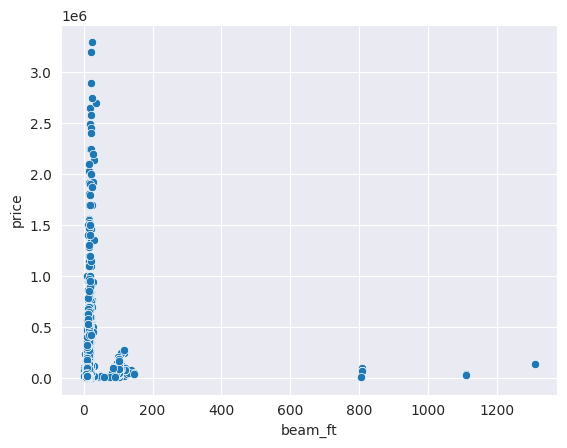

In [240]:
sns.scatterplot(x=df['beam_ft'],y=df['price'])

In [241]:
beam_outlier = df.query('beam_ft>200').index
df.drop(beam_outlier,inplace=True)

<Axes: xlabel='beam_ft', ylabel='price'>

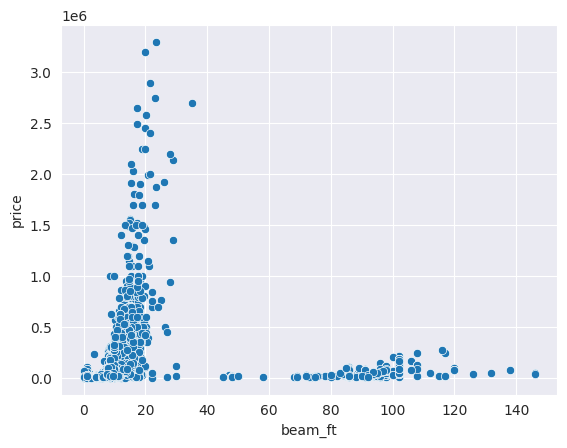

In [242]:
sns.scatterplot(x=df['beam_ft'],y=df['price'])

In [243]:
df['hullMaterial'].value_counts()

,count
hullMaterial,
fiberglass,8036
aluminum,5048
other,4604
composite,153
wood,63
steel,21
pvc,20
hypalon,19
ferro-cement,9


In [244]:
# Only take the first three and change all others into others
df['hullMaterial'].replace(to_replace=['composite', 'wood', 'steel', 'pvc', 'hypalon', 'ferro-cement'],value='other',inplace=True)

(-100000.0, 1000000.0)

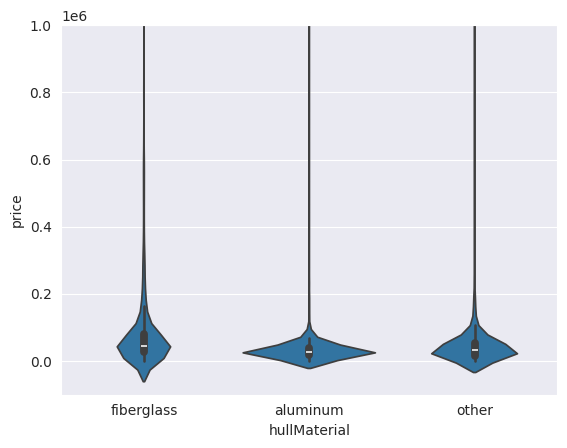

In [245]:
sns.violinplot(x=df['hullMaterial'],y=df['price'])
plt.ylim(-100000,1000000)

<Axes: xlabel='hullMaterial', ylabel='price'>

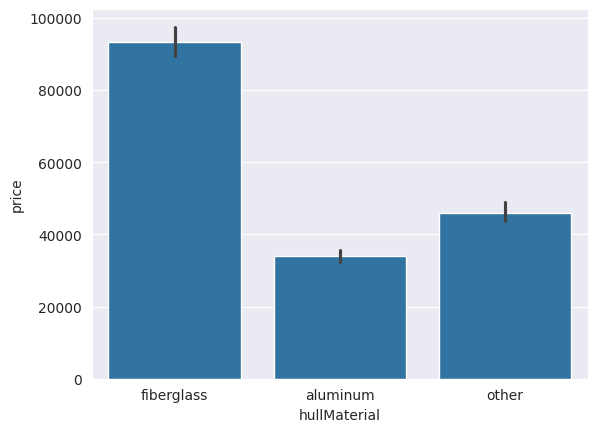

In [246]:
sns.barplot(x=df['hullMaterial'],y=df['price'])

In [247]:
# Fibreglass got more average price

In [248]:
df['fuelType'].value_counts()

,count
fuelType,
other,7874
gasoline,6255
diesel,915
electric,13


<Axes: xlabel='fuelType', ylabel='price'>

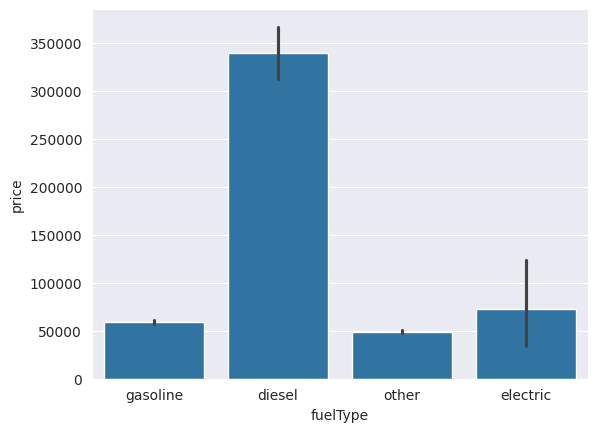

In [249]:
sns.barplot(x=df['fuelType'],y=df['price'])

In [250]:
# Only taking the diesel and gasoline setting other as other value
df['fuelType'].replace(to_replace=['electric'],value='other',inplace=True)

In [251]:
df['numEngines'].value_counts()

,count
numEngines,
1,15181
2,1846
0,827
4,66
3,53


<Axes: xlabel='numEngines', ylabel='price'>

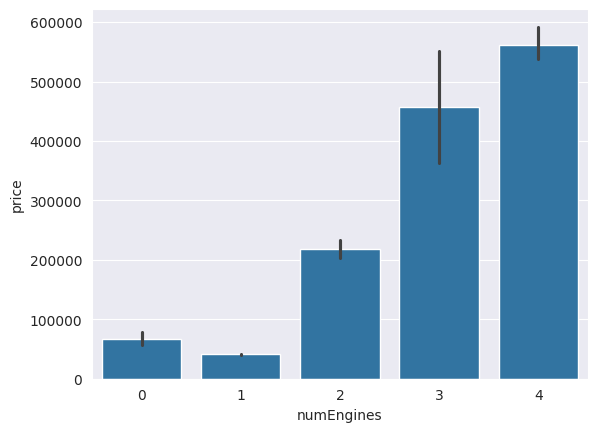

In [252]:
sns.barplot(x=df['numEngines'],y=df['price'])

In [253]:
# Since we don't hae much data above 2 engine we mix them
df['numEngines'].replace([3,4],4,inplace=True)

<Axes: ylabel='Frequency'>

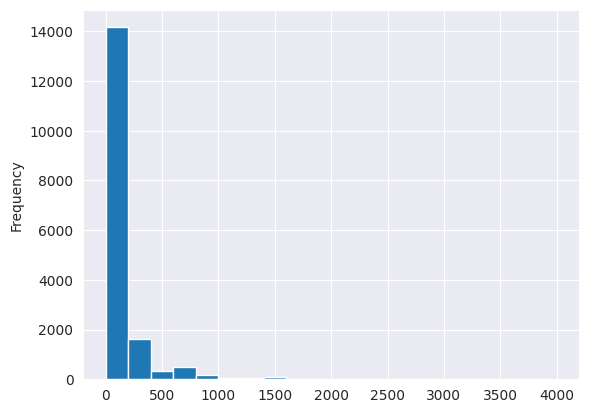

In [254]:
df['totalHP'].plot(kind='hist',bins=20)

<Axes: xlabel='totalHP', ylabel='price'>

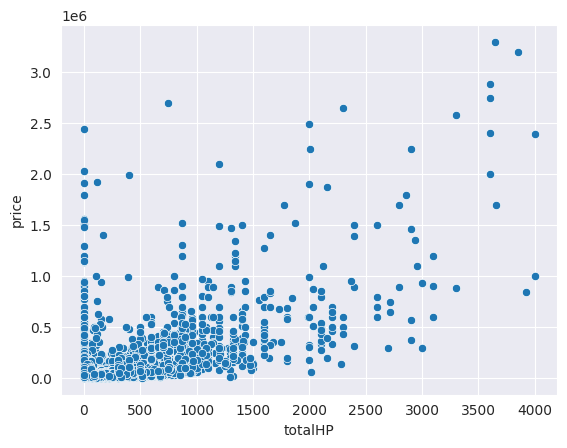

In [255]:
sns.scatterplot(x=df['totalHP'],y=df['price'])

In [256]:
df.drop(df.query('totalHP>3850').index,inplace=True)

In [257]:
common_city = df.city.value_counts().head(30).index

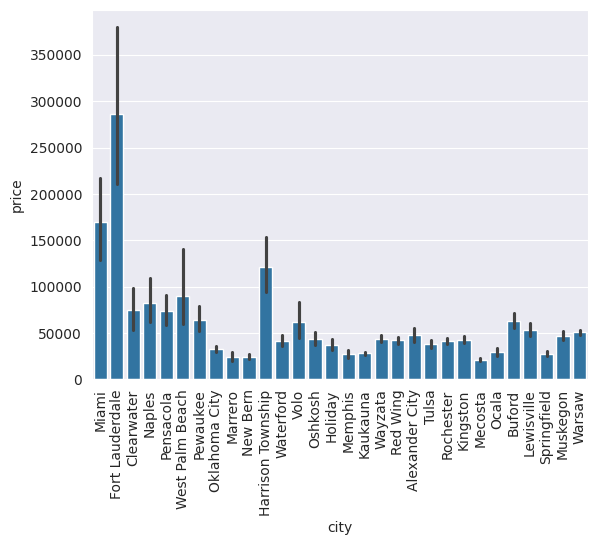

In [258]:
x = df[df['city'].isin(common_city)]['city']
y = df[df['city'].isin(common_city)]['price']
sns.barplot(x=x,y=y)
plt.xticks(rotation='vertical')
plt.show()

In [259]:
x.value_counts()

,count
city,
Red Wing,458
Rochester,443
Wayzata,364
Mecosta,338
Kingston,276
Marrero,268
Miami,233
Kaukauna,218
New Bern,185


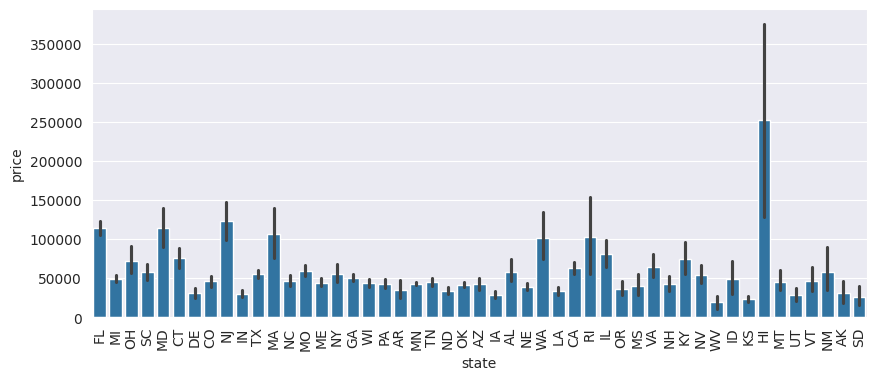

In [260]:
plt.figure(figsize=(10,4))
sns.barplot(x=df['state'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

In [261]:
df['created_year'].value_counts()

,count
created_year,
2019,12193
2018,4204
2017,842
2016,316
2015,163
2014,78
2013,49
2011,38
2012,38


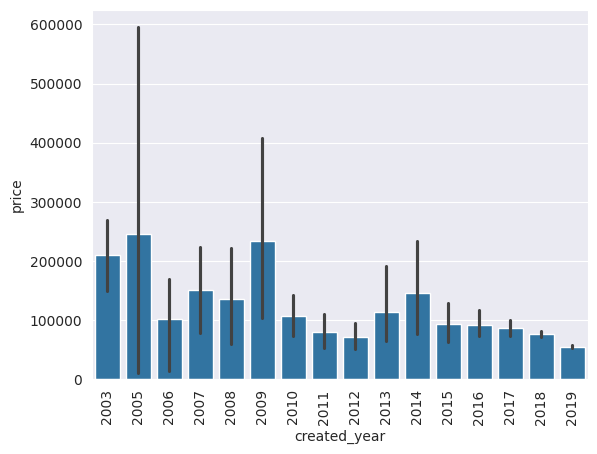

In [262]:
sns.barplot(x=df['created_year'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

In [263]:
df['year'].value_counts()

,count
year,
2019,7792
2020,1621
2018,1381
2017,593
2016,494
...,...
1953,1
1910,1
1922,1


In [264]:
df.drop(columns=['created_date','created_month'],inplace=True)

In [265]:
df.duplicated().sum()

403

In [266]:
df.drop_duplicates(inplace=True)

In [267]:
df['type'].value_counts()

,count
type,
power,17279
sail,254
unpowered,34


In [268]:
df = df[df.type=='power']

In [269]:
df.drop('type',axis=1,inplace=True)

<ipython-input-269-4bb2c5773735>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('type',axis=1,inplace=True)


In [270]:
common_boatclass = df['boatClass'].value_counts()[df['boatClass'].value_counts()>500].index

In [271]:
df['boatClass'] = np.where(df['boatClass'].isin(common_boatclass),df['boatClass'],'other')

In [272]:
common_make = df.make.value_counts().head(9).index

In [273]:
df['make'] = np.where(df['make'].isin(common_make),df['make'],'other')

In [274]:
common_model = df.model.value_counts().head(31).index

In [275]:
df['model'] = np.where(df['model'].isin(common_model),df['model'],'other')

In [276]:
common_year = df.year.value_counts().head(6).index

In [277]:
df['year'] = np.where(df['year'].isin(common_year),df['year'],'other')

In [278]:
df['condition'] = df['condition'].map({'new':0,'used':1})

<Axes: ylabel='Frequency'>

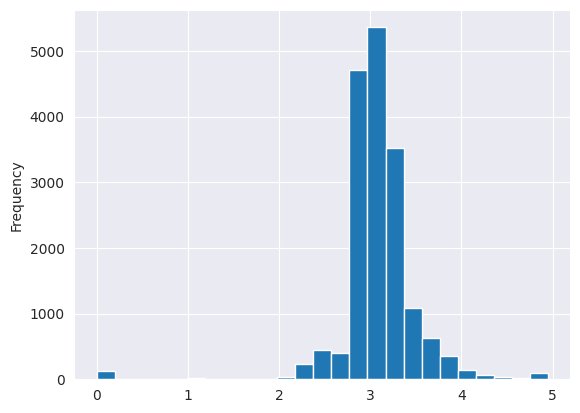

In [279]:
np.log(df.length_ft).plot(kind='hist',bins=25)

<Axes: ylabel='Frequency'>

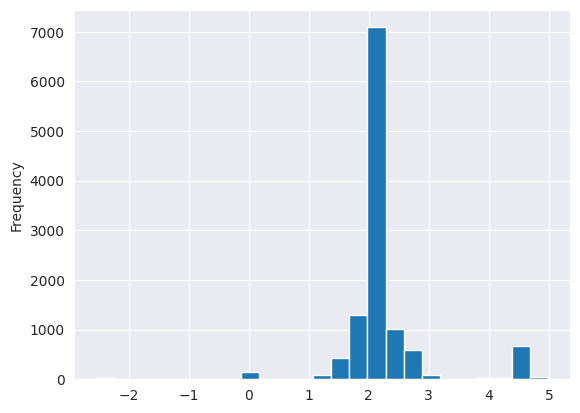

In [280]:
np.log(df.beam_ft).plot(kind='hist',bins=25)

In [281]:
df.hullMaterial.value_counts()

,count
hullMaterial,
fiberglass,7700
aluminum,4919
other,4660


In [282]:
df.fuelType.value_counts()

,count
fuelType,
other,7592
gasoline,6168
diesel,699


In [283]:
df.numEngines.value_counts()

,count
numEngines,
1,14559
2,1833
0,768
4,119


In [284]:
df.drop('city',axis=1,inplace=True)

In [285]:
common_state = df.state.value_counts().head(10).index

In [286]:
df['state'] = np.where(df['state'].isin(common_state),df['state'],'others')

In [287]:
common_created_year = df['created_year'].value_counts().head(3).index

In [288]:
df['created_year'] = np.where(df['created_year'].isin(common_created_year),df['created_year'],'others')

In [289]:
df['beam_ft'].fillna(df['beam_ft'].mean(),inplace=True)

df['totalHP'].fillna(df['totalHP'].mean(),inplace=True)

In [307]:
df['fuelType'] = df['fuelType'].fillna('other')

In [308]:
df.isnull().sum()

,0
boatClass,0
make,0
model,0
year,0
condition,0
length_ft,0
beam_ft,0
hullMaterial,0
fuelType,0
numEngines,0


In [292]:
X = df.drop('price',axis=1)

In [293]:
y = df.price

In [294]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [295]:
clf = ColumnTransformer(transformers=[
    ('Ohe',OneHotEncoder(drop='first',sparse_output=False),[0,1,2,3,7,8,11,12]),
    ('scl',StandardScaler(),[5,6,10])
])
pipe = Pipeline(steps=[
    ('tran',clf),
    ('train',RandomForestRegressor(n_estimators=500,max_depth=1200,max_samples=1000))
])

In [296]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tran',
                 ColumnTransformer(transformers=[('Ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 3, 7, 8, 11, 12]),
                                                 ('scl', StandardScaler(),
                                                  [5, 6, 10])])),
                ('train',
                 RandomForestRegressor(max_depth=1200, max_samples=1000,
                                       n_estimators=500))])

In [350]:
np.mean(cross_val_score(pipe,X_train,y_train,cv=5,scoring='r2')*100)

71.11643088256102

In [311]:
clf.fit_transform(X_train).shape

(13823, 79)

In [299]:
## ANN

In [386]:
# Sequential model initialization
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=79))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 128)                 │          10,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,881 (105.00 KB)

 Trainable params: 26,881 (105.00 KB)

 Non-trainable params: 0 (0.00 B)

In [387]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [ ]:
clf = ColumnTransformer(transformers=[
    ('Ohe',OneHotEncoder(drop='first',sparse_output=False),[0,1,2,3,7,8,11,12]),
    ('scl',StandardScaler(),[5,6,10])
])
pipe = Pipeline(steps=[
    ('tran',clf),
    ('train',model())
])

In [388]:
X_trf = clf.fit_transform(X_train)
history = model.fit(X_trf,y_train,epochs=1000,verbose=True,validation_split=0.2,callbacks=EarlyStopping(min_delta=100,patience=50,monitor='val_loss',verbose=1))

Epoch 1/1000
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 28591370240.0000 - val_loss: 17038110720.0000
Epoch 2/1000
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20078239744.0000 - val_loss: 13922933760.0000
Epoch 3/1000
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 16900435968.0000 - val_loss: 12774346752.0000
Epoch 4/1000
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 17209001984.0000 - val_loss: 11774312448.0000
Epoch 5/1000
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14117602304.0000 - val_loss: 10934598656.0000
Epoch 6/1000
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14054333440.0000 - val_loss: 10251797504.0000
Epoch 7/1000
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11066047488.0000 - val_loss: 9728530432.0000
Epoch 8/1000
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10596826112.0000 - val_loss: 9311828992.0000
Epoch 9/1000
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11492455424.0000 - val_loss: 9015928832.0000
Epoch 10/1000
346/346 ━━━━━━━━━

In [389]:
X_test_trf = clf.fit_transform(X_test)
y_pred = model.predict(X_test_trf)

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [326]:
from sklearn.metrics import r2_score

In [390]:
r2_score(y_test,y_pred)

0.7980611322184202

In [ ]:
import matplotlib.pyplot as plt


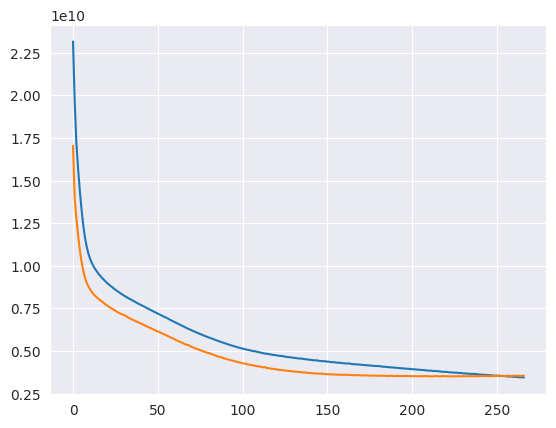

In [391]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
model.add(Dropout(rate=.3))